In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing data

df = pd.read_csv(r'C:\Users\USER\Desktop\packt\ML projects\CODES\2. Multiple Linear Regression\Multiple_Linear_Regression\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


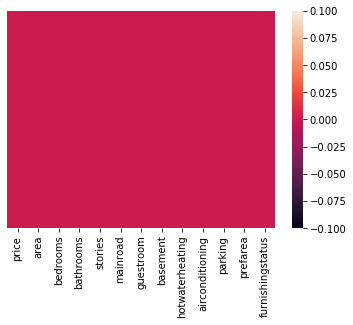

In [4]:
# Check for missing values

sns.heatmap(df.isnull() , yticklabels=False)

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Objective - Predicting price of a house given multiple independant features

In [6]:
# Encoding categorical data with factor level-2

df['mainroad'] = df['mainroad'].map({'yes':1 , 'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1 , 'no':0})
df['basement'] = df['basement'].map({'yes':1 , 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1 , 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1 , 'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1 , 'no':0})

In [7]:
# Encoding categorical data with dummy variables

x = pd.get_dummies(df['furnishingstatus'],drop_first=True)
df = pd.concat([x,df],axis=1)
df.drop('furnishingstatus',axis=1,inplace=True)

In [8]:
df.head()

,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,0,0,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,1,0,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,0,0,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,0,0,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [9]:
# FEATURE ADDITION - 1

df['area_per_bedroom'] = df['area'] / df['bedrooms']

# FEATURE ADDITION - 2
df['bbratio'] = df['bathrooms'] / df['bedrooms']

df.head()

,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,area_per_bedroom,bbratio
0,0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1855.0,0.500000
1,0,0,12250000,8960,4,4,4,1,0,0,0,1,3,0,2240.0,1.000000
2,1,0,12250000,9960,3,2,2,1,0,1,0,0,2,1,3320.0,0.666667
3,0,0,12215000,7500,4,2,2,1,0,1,0,1,3,1,1875.0,0.500000
4,0,0,11410000,7420,4,1,2,1,1,1,0,1,2,0,1855.0,0.250000


In [10]:
# Rescaling the data

# normalisation   : min - max scaling , all values will be in between 0 and 1
# standardisation : mean-0 , std dev-1  

def normalisation(x):
    return (x-min(x))/ (max(x)-min(x))

df = df.apply(normalisation)
df.head()

,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,area_per_bedroom,bbratio
0,0.0,0.0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.237016,0.4
1,0.0,0.0,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.298923,1.0
2,1.0,0.0,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.472584,0.6
3,0.0,0.0,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.240232,0.4
4,0.0,0.0,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.237016,0.1


# DATA SPLIT

In [11]:
import statsmodels.api as sm

X = sm.add_constant(df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'area_per_bedroom', 'bbratio']])
y = df['price']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# MODEL BUILDING

In [14]:
lm = sm.OLS(y_train,X_train).fit()

# MODEL DIAGNOSIS

In [15]:
print(lm.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.673    
Dependent Variable: price            AIC:                -736.8051
Date:               2020-05-03 19:09 BIC:                -673.7203
No. Observations:   381              Log-Likelihood:     384.40   
Df Model:           15               F-statistic:        53.12    
Df Residuals:       365              Prob (F-statistic): 4.56e-82 
R-squared:          0.686            Scale:              0.0081248
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0603   0.0586  1.0286 0.3043 -0.0550  0.1755
area                0.5745   0.1341  4.2853 0.0000  0.3109  0.8381
bedrooms           -0.0587   0.0929 -0.6315 0.5281 -0.2414  0.1241
bathrooms           0.2336   0.1264  1.8486 0.0653 -0.0149  0.4821
stories      

In [16]:
# VIF

def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [17]:
vif = vif_cal(df,'price')
print(vif)

                 Var    Vif
13  area_per_bedroom  68.71
2               area  57.52
14           bbratio  29.25
4          bathrooms  11.11
3           bedrooms  10.68
6           mainroad   7.91
5            stories   2.81
0     semi-furnished   2.61
1        unfurnished   2.38
8           basement   2.05
11           parking   2.01
10   airconditioning   1.77
12          prefarea   1.51
7          guestroom   1.49
9    hotwaterheating   1.10


# MODEL BUILDING - REMOVING 'bbratio'

In [18]:
X = sm.add_constant(df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'area_per_bedroom']])
y = df['price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [20]:
lm2 = sm.OLS(y_train,X_train).fit()

In [21]:
print(lm2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.674    
Dependent Variable: price            AIC:                -738.6198
Date:               2020-05-03 19:09 BIC:                -679.4778
No. Observations:   381              Log-Likelihood:     384.31   
Df Model:           14               F-statistic:        57.03    
Df Residuals:       366              Prob (F-statistic): 6.46e-83 
R-squared:          0.686            Scale:              0.0081065
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0799   0.0357  2.2392 0.0257  0.0097  0.1500
area                0.5483   0.1186  4.6221 0.0000  0.3150  0.7815
bedrooms           -0.0845   0.0699 -1.2094 0.2273 -0.2218  0.0529
bathrooms           0.2850   0.0328  8.6863 0.0000  0.2205  0.3495
stories      

In [22]:
# vif after removing bbratio

vif2 = vif_cal(df.drop('bbratio',axis=1),'price')
print(vif2)

                 Var    Vif
2               area  20.72
13  area_per_bedroom  18.44
3           bedrooms  10.03
6           mainroad   7.46
5            stories   2.78
0     semi-furnished   2.48
1        unfurnished   2.20
8           basement   2.03
11           parking   2.00
10   airconditioning   1.77
4          bathrooms   1.71
12          prefarea   1.51
7          guestroom   1.48
9    hotwaterheating   1.09


# MODEL BUILDING - REMOVING 'bedrooms'

In [23]:
X = sm.add_constant(df[['area', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'area_per_bedroom']])
y = df['price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [25]:
lm3 = sm.OLS(y_train,X_train).fit()

In [26]:
print(lm3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.673    
Dependent Variable: price            AIC:                -739.1004
Date:               2020-05-03 19:09 BIC:                -683.9012
No. Observations:   381              Log-Likelihood:     383.55   
Df Model:           13               F-statistic:        61.23    
Df Residuals:       367              Prob (F-statistic): 1.66e-83 
R-squared:          0.684            Scale:              0.0081167
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0427   0.0181  2.3621 0.0187  0.0071  0.0782
area                0.4326   0.0702  6.1645 0.0000  0.2946  0.5706
bathrooms           0.2814   0.0327  8.6063 0.0000  0.2171  0.3457
stories             0.1005   0.0192  5.2237 0.0000  0.0627  0.1384
mainroad     

In [27]:
# vif after removing bbration , bedrooms

vif3 = vif_cal(df.drop(['bbratio','bedrooms'],axis=1),'price')
print(vif3)

                 Var    Vif
2               area  14.98
12  area_per_bedroom  13.88
5           mainroad   6.10
4            stories   2.56
0     semi-furnished   2.04
10           parking   2.00
7           basement   1.90
9    airconditioning   1.76
1        unfurnished   1.72
3          bathrooms   1.69
11          prefarea   1.50
6          guestroom   1.48
8    hotwaterheating   1.09


# MODEL BUILDING - REMOVING 'area_per_bedroom'

In [28]:
X = sm.add_constant(df[['area', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished']])
y = df['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [30]:
lm4 = sm.OLS(y_train,X_train).fit()

In [31]:
print(lm4.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.670    
Dependent Variable: price            AIC:                -735.9177
Date:               2020-05-03 19:09 BIC:                -684.6613
No. Observations:   381              Log-Likelihood:     380.96   
Df Model:           12               F-statistic:        65.20    
Df Residuals:       368              Prob (F-statistic): 2.35e-83 
R-squared:          0.680            Scale:              0.0082055
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0313   0.0174  1.7948 0.0735 -0.0030  0.0655
area                0.3008   0.0386  7.7994 0.0000  0.2250  0.3767
bathrooms           0.2947   0.0323  9.1141 0.0000  0.2311  0.3582
stories             0.1178   0.0177  6.6435 0.0000  0.0829  0.1527
mainroad     

In [32]:
# vif after removing bbratio,bedrooms,area_per_bedroom

vif4 = vif_cal(df.drop(['bbratio','bedrooms','area_per_bedroom'],axis=1),'price')
print(vif4)

                Var   Vif
5          mainroad  5.51
2              area  4.43
4           stories  2.32
0    semi-furnished  2.00
10          parking  1.99
7          basement  1.90
9   airconditioning  1.76
1       unfurnished  1.65
3         bathrooms  1.62
11         prefarea  1.50
6         guestroom  1.47
8   hotwaterheating  1.09


# MODEL BUILDING - REMOVING 'semi-furnished'

In [33]:
X = sm.add_constant(df[['area', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'unfurnished']])
y = df['price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [35]:
lm5 = sm.OLS(y_train,X_train).fit()

In [36]:
print(lm5.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.671    
Dependent Variable: price            AIC:                -737.9130
Date:               2020-05-03 19:09 BIC:                -690.5994
No. Observations:   381              Log-Likelihood:     380.96   
Df Model:           11               F-statistic:        71.31    
Df Residuals:       369              Prob (F-statistic): 2.73e-84 
R-squared:          0.680            Scale:              0.0081834
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0319   0.0149  2.1423 0.0328  0.0026  0.0611
area                0.3006   0.0383  7.8508 0.0000  0.2253  0.3758
bathrooms           0.2947   0.0323  9.1324 0.0000  0.2313  0.3582
stories             0.1178   0.0177  6.6538 0.0000  0.0830  0.1526
mainroad     

In [37]:
# vif after removing bbratio,bedrooms,area_per_bedroom,semi-furnished

vif5 = vif_cal(df.drop(['bbratio','bedrooms','area_per_bedroom','semi-furnished'],axis=1),'price')
print(vif5)

                Var   Vif
4          mainroad  4.85
1              area  4.36
3           stories  2.30
9           parking  1.99
6          basement  1.86
8   airconditioning  1.75
2         bathrooms  1.62
10         prefarea  1.49
5         guestroom  1.47
0       unfurnished  1.34
7   hotwaterheating  1.08


# MODEL BUILDING - REMOVING 'basement'

In [38]:
X = sm.add_constant(df[['area', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'unfurnished']])
y = df['price']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [40]:
lm6 = sm.OLS(y_train,X_train).fit()

In [41]:
print(lm6.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.667    
Dependent Variable: price            AIC:                -735.0258
Date:               2020-05-03 19:09 BIC:                -691.6550
No. Observations:   381              Log-Likelihood:     378.51   
Df Model:           10               F-statistic:        77.18    
Df Residuals:       370              Prob (F-statistic): 3.13e-84 
R-squared:          0.676            Scale:              0.0082667
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0390   0.0146  2.6700 0.0079  0.0103  0.0677
area                0.2990   0.0385  7.7716 0.0000  0.2233  0.3746
bathrooms           0.3028   0.0322  9.3968 0.0000  0.2394  0.3661
stories             0.1081   0.0172  6.2773 0.0000  0.0743  0.1420
mainroad     

In [42]:
# vif after removing bbratio,bedrooms,area_per_bedroom,semi-furnished,basement

vif6 = vif_cal(df.drop(['bbratio','bedrooms','area_per_bedroom','semi-furnished','basement'],axis=1),'price')
print(vif6)

               Var   Vif
4         mainroad  4.58
1             area  4.36
3          stories  2.21
8          parking  1.99
7  airconditioning  1.75
2        bathrooms  1.59
9         prefarea  1.44
0      unfurnished  1.34
5        guestroom  1.29
6  hotwaterheating  1.08


# MODEL DIAGNOSIS

Text(0.5, 1.0, 'Normality test')

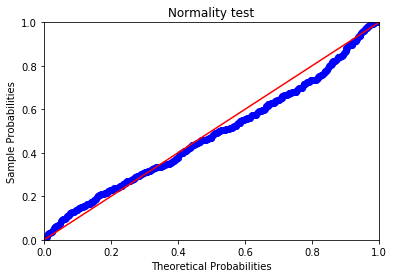

In [43]:
# Residual Analysis

resid = lm6.resid_pearson
x = sm.ProbPlot(resid)
x.ppplot(line='45')
plt.title('Normality test')

Text(0.5, 1.0, 'Test for homoscedasticity')

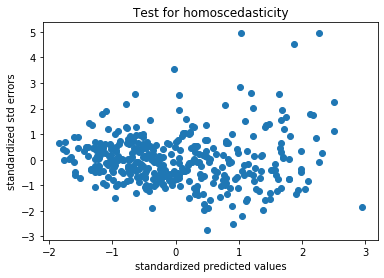

In [44]:
# Test for homoscedasticity

def standardisation(x):
    return (x-x.mean())/x.std()


plt.scatter(standardisation(lm6.fittedvalues) , standardisation(lm6.resid))
plt.xlabel('standardized predicted values')
plt.ylabel('standardized std errors')
plt.title('Test for homoscedasticity')

# PREDICTIONS

In [45]:
pred6 = lm6.predict(X_test)

# ACCURACY

In [46]:
# RMSE

from sklearn import metrics

np.sqrt(metrics.mean_squared_error(y_test,pred6))

0.10001092336807832

Text(0.5, 1.0, 'actual vs pred')

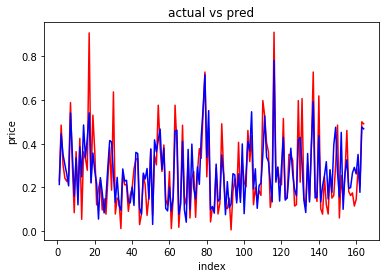

In [47]:
# Actual vs pred

c = [i for i in range(1,165,1)]

plt.plot(c,y_test,'red')
plt.plot(c,pred6,'blue')
plt.xlabel('index')
plt.ylabel('price')
plt.title('actual vs pred')

Text(0.5, 1.0, 'Error terms')

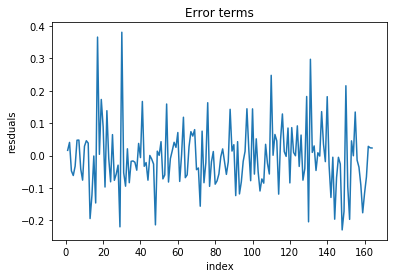

In [48]:
# Error terms

c = [i for i in range(1,165,1)]
plt.plot(c,y_test-pred6)
plt.xlabel('index')
plt.ylabel('resduals')
plt.title('Error terms')